In [1]:
import matplotlib.pyplot as plt

from livae.utils import load_image_from_h5
from livae.data import PatchDataset

%load_ext autoreload
%autoreload 2

In [2]:
images = []

# open data files and load all h5 files
data_dir = "../data/"
file_names = [
    "HAADF1.h5",
    "HAADF2.h5",
    "HAADF3.h5",
]
for file_name in file_names:
    file_path = data_dir + file_name
    image = load_image_from_h5(file_path, "Measurement_000/Channel_000/HAADF/HAADF")
    images.append(image)
    print(f"Loaded {file_name} with shape {image.shape}")

Loaded HAADF1.h5 with shape (2048, 2048)
Loaded HAADF2.h5 with shape (2048, 2048)
Loaded HAADF3.h5 with shape (2048, 2048)


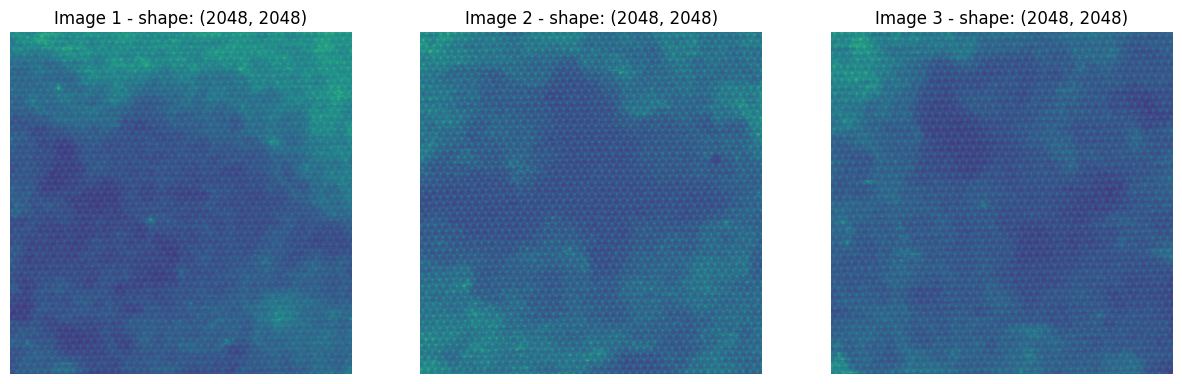

In [3]:
fig = plt.figure(figsize=(15, 5))
for i, image in enumerate(images):
    ax = fig.add_subplot(1, len(images), i + 1)
    ax.imshow(image)
    ax.set_title(f"Image {i + 1} - shape: {image.shape}")
    ax.axis("off")
plt.show()

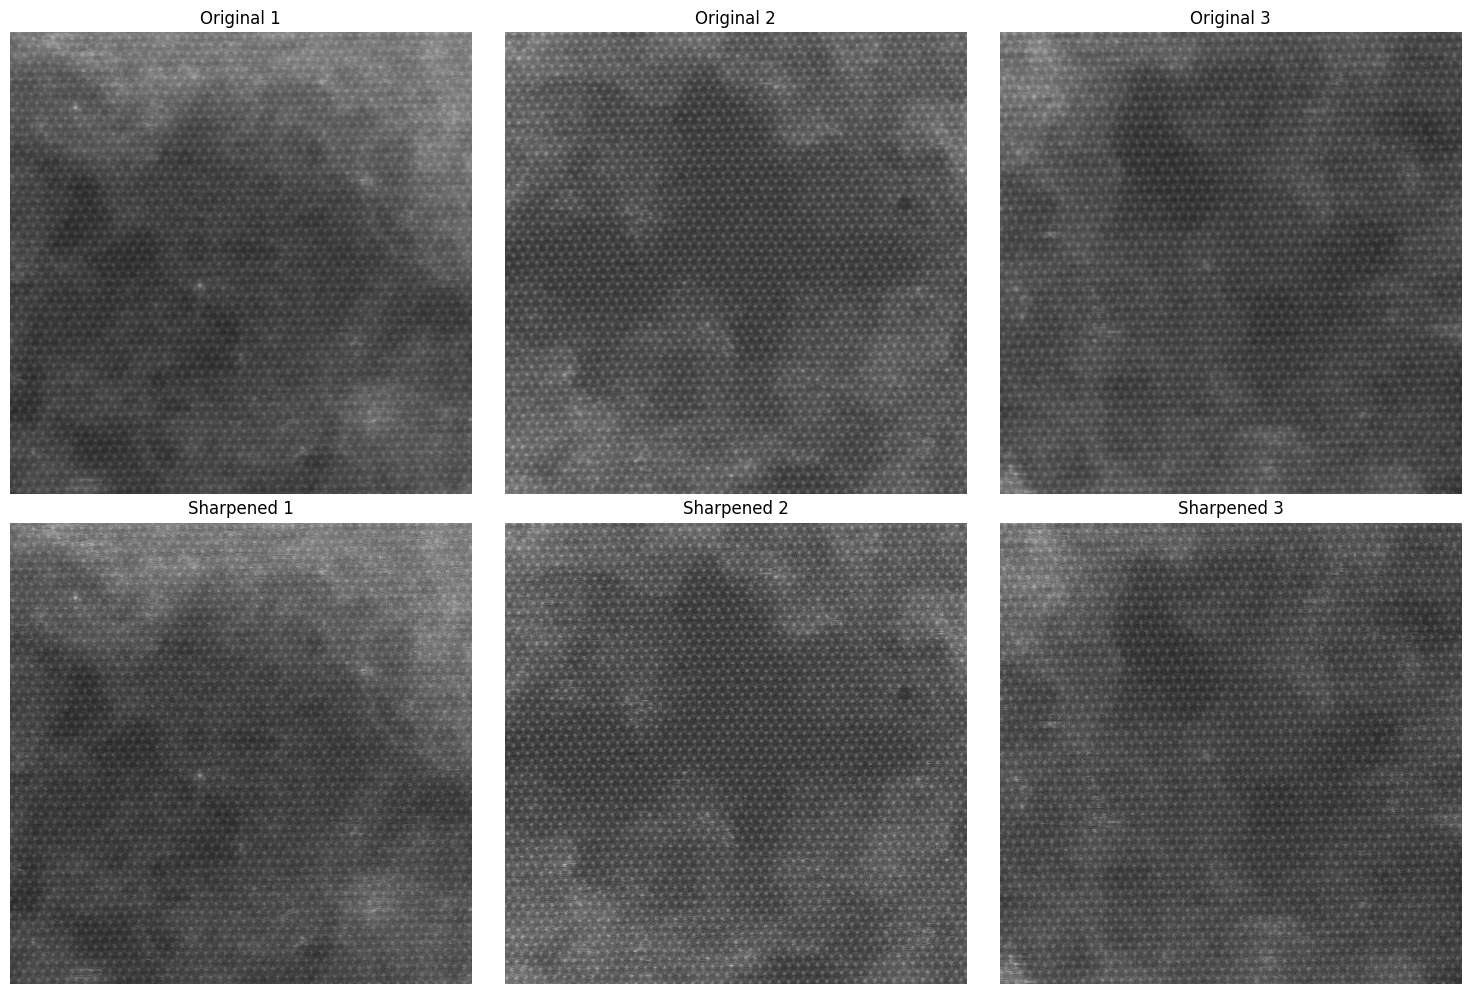

In [14]:
# Apply sharpening filters to enhance lattice structure
from scipy import ndimage
from skimage import filters
import numpy as np

# Create sharpened versions of the images
sharpened_images = []

for image in images:
    # Normalize image to 0-1 range
    img_norm = (image - image.min()) / (image.max() - image.min())

    # Apply unsharp masking for sharpening
    # This enhances edges and fine details like the hexagonal lattice
    sharpened = filters.unsharp_mask(img_norm, radius=2, amount=2.0)

    # Optionally apply mild contrast enhancement
    sharpened = np.clip(sharpened, 0, 1)

    sharpened_images.append(sharpened)

# Display sharpened images alongside originals
fig = plt.figure(figsize=(15, 10))
for i, (original, sharpened) in enumerate(zip(images, sharpened_images)):
    # Original
    ax = fig.add_subplot(2, len(images), i + 1)
    ax.imshow(original, cmap="gray")
    ax.set_title(f"Original {i + 1}")
    ax.axis("off")

    # Sharpened
    ax = fig.add_subplot(2, len(images), len(images) + i + 1)
    ax.imshow(sharpened, cmap="gray")
    ax.set_title(f"Sharpened {i + 1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

Detected 6842 atoms, 5687 after edge exclusion.
Detected 6478 atoms, 5383 after edge exclusion.
Detected 5320 atoms, 4463 after edge exclusion.
Created sharpened PatchDataset with 15533 patches


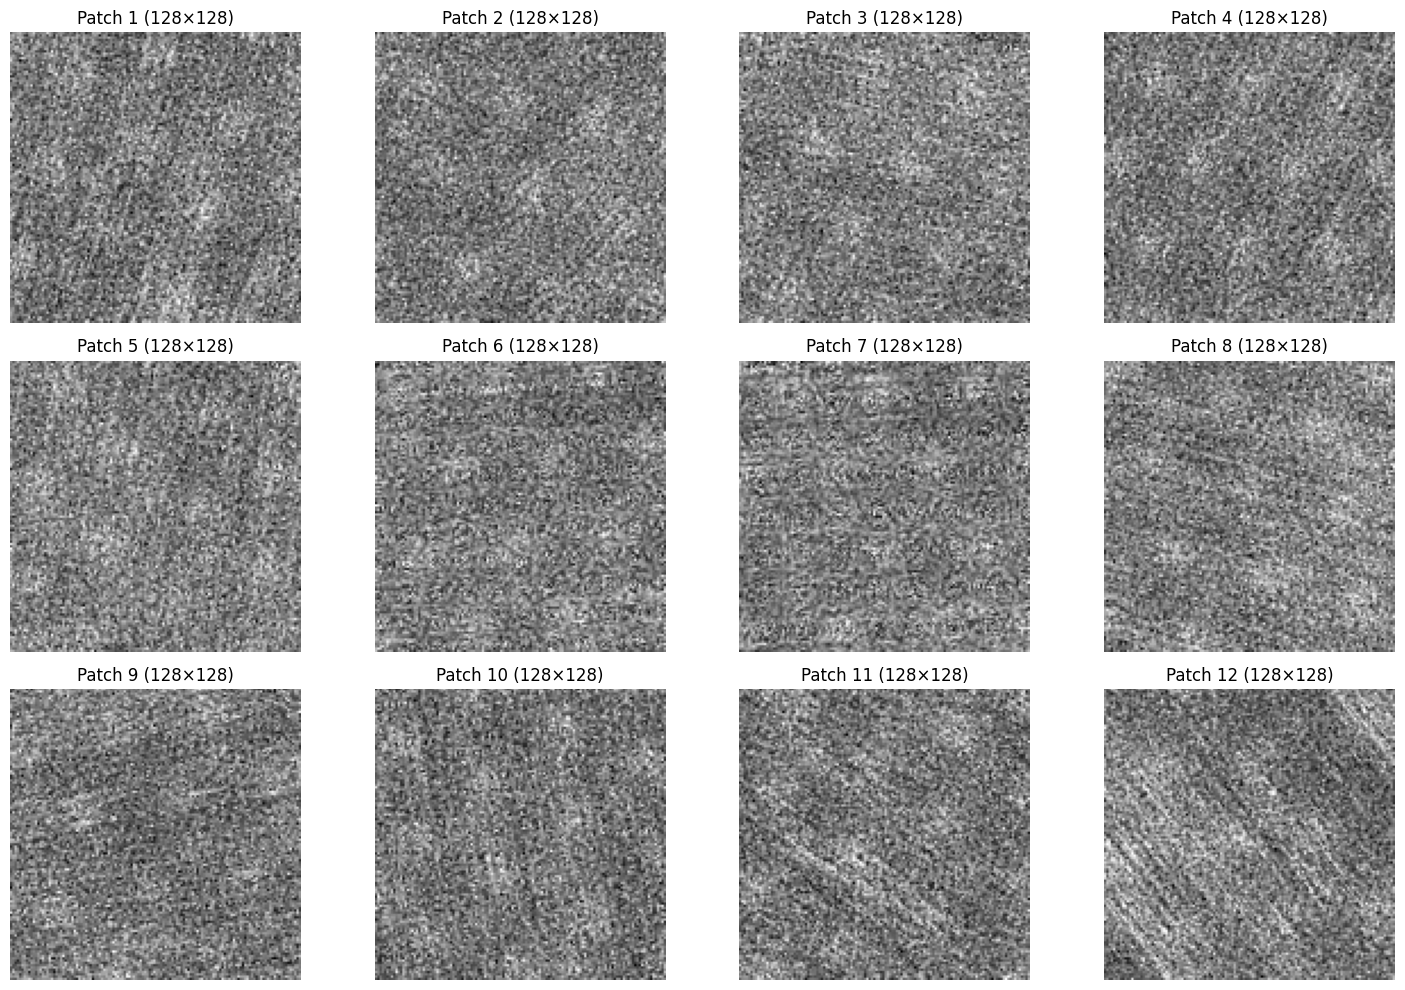

In [19]:
# Create patches from sharpened images to see individual hexagon clusters
# Each patch should show ~7 atoms in hexagonal arrangement (1 center + 6 neighbors)

ds_sharpened = PatchDataset(sharpened_images, patch_size=128)
print(f"Created sharpened PatchDataset with {len(ds_sharpened)} patches")

# Display sample 128x128 patches from sharpened images
fig = plt.figure(figsize=(15, 10))
for i in range(12):
    patch = ds_sharpened[i].squeeze()
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(patch, cmap="gray")
    ax.set_title(f"Patch {i + 1} (128×128)")
    ax.axis("off")

plt.tight_layout()
plt.show()

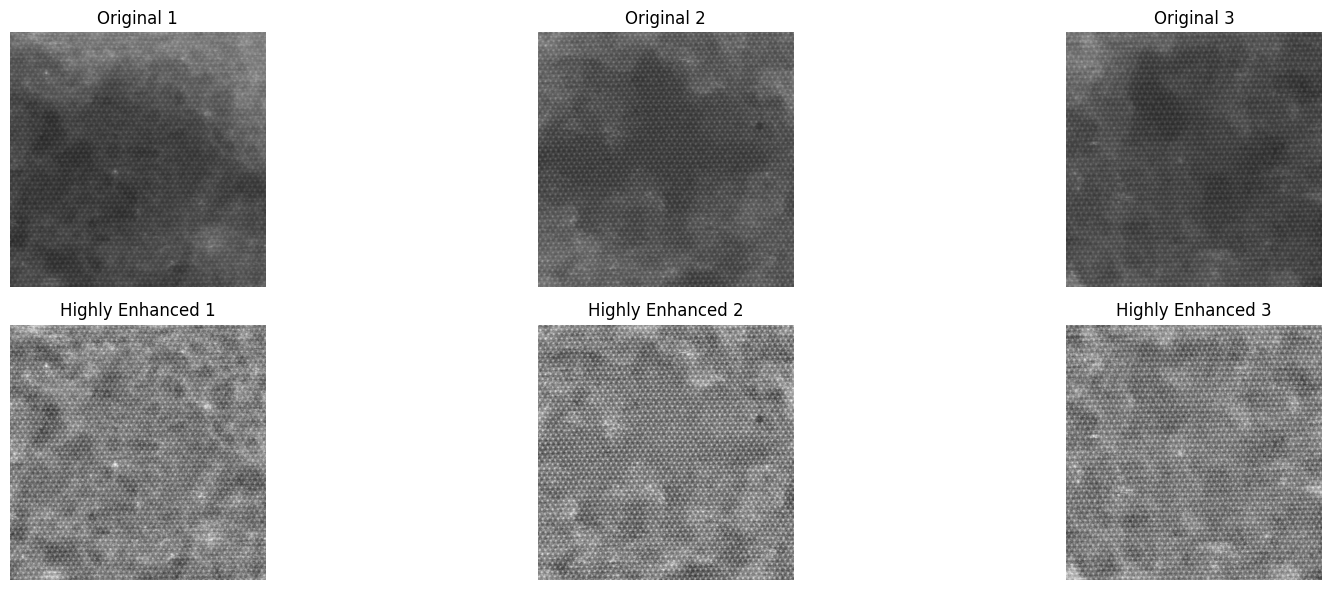

✓ Applied advanced enhancement techniques:
  - Adaptive histogram equalization (CLAHE)
  - Aggressive unsharp masking
  - Laplacian edge enhancement
  - Atoms should now be clearly visible!


In [20]:
# Advanced enhancement: Combine multiple techniques for maximum atom visibility
from skimage import exposure

highly_enhanced_images = []

for image in images:
    # Step 1: Normalize to 0-1 range
    img_norm = (image - image.min()) / (image.max() - image.min())

    # Step 2: Apply adaptive histogram equalization (CLAHE) for local contrast enhancement
    # This makes individual atoms stand out more clearly
    img_clahe = exposure.equalize_adapthist(img_norm, clip_limit=0.02, nbins=256)

    # Step 3: Apply aggressive unsharp masking
    img_sharpened = filters.unsharp_mask(img_clahe, radius=1.0, amount=3.5)

    # Step 4: Apply Laplacian sharpening for edge enhancement
    laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)
    img_laplacian = ndimage.convolve(img_sharpened, laplacian_kernel / 4.0)

    # Step 5: Combine with original sharpened image
    img_enhanced = img_sharpened + 0.3 * img_laplacian

    # Step 6: Clip to valid range and normalize
    img_enhanced = np.clip(img_enhanced, 0, 1)

    highly_enhanced_images.append(img_enhanced)

# Display side-by-side comparison: Original vs Highly Enhanced
fig = plt.figure(figsize=(18, 6))
for i in range(len(highly_enhanced_images)):
    # Original
    ax = fig.add_subplot(2, len(highly_enhanced_images), i + 1)
    ax.imshow(images[i], cmap="gray")
    ax.set_title(f"Original {i + 1}")
    ax.axis("off")

    # Highly Enhanced
    ax = fig.add_subplot(
        2, len(highly_enhanced_images), len(highly_enhanced_images) + i + 1
    )
    ax.imshow(highly_enhanced_images[i], cmap="gray")
    ax.set_title(f"Highly Enhanced {i + 1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

print("✓ Applied advanced enhancement techniques:")
print("  - Adaptive histogram equalization (CLAHE)")
print("  - Aggressive unsharp masking")
print("  - Laplacian edge enhancement")
print("  - Atoms should now be clearly visible!")

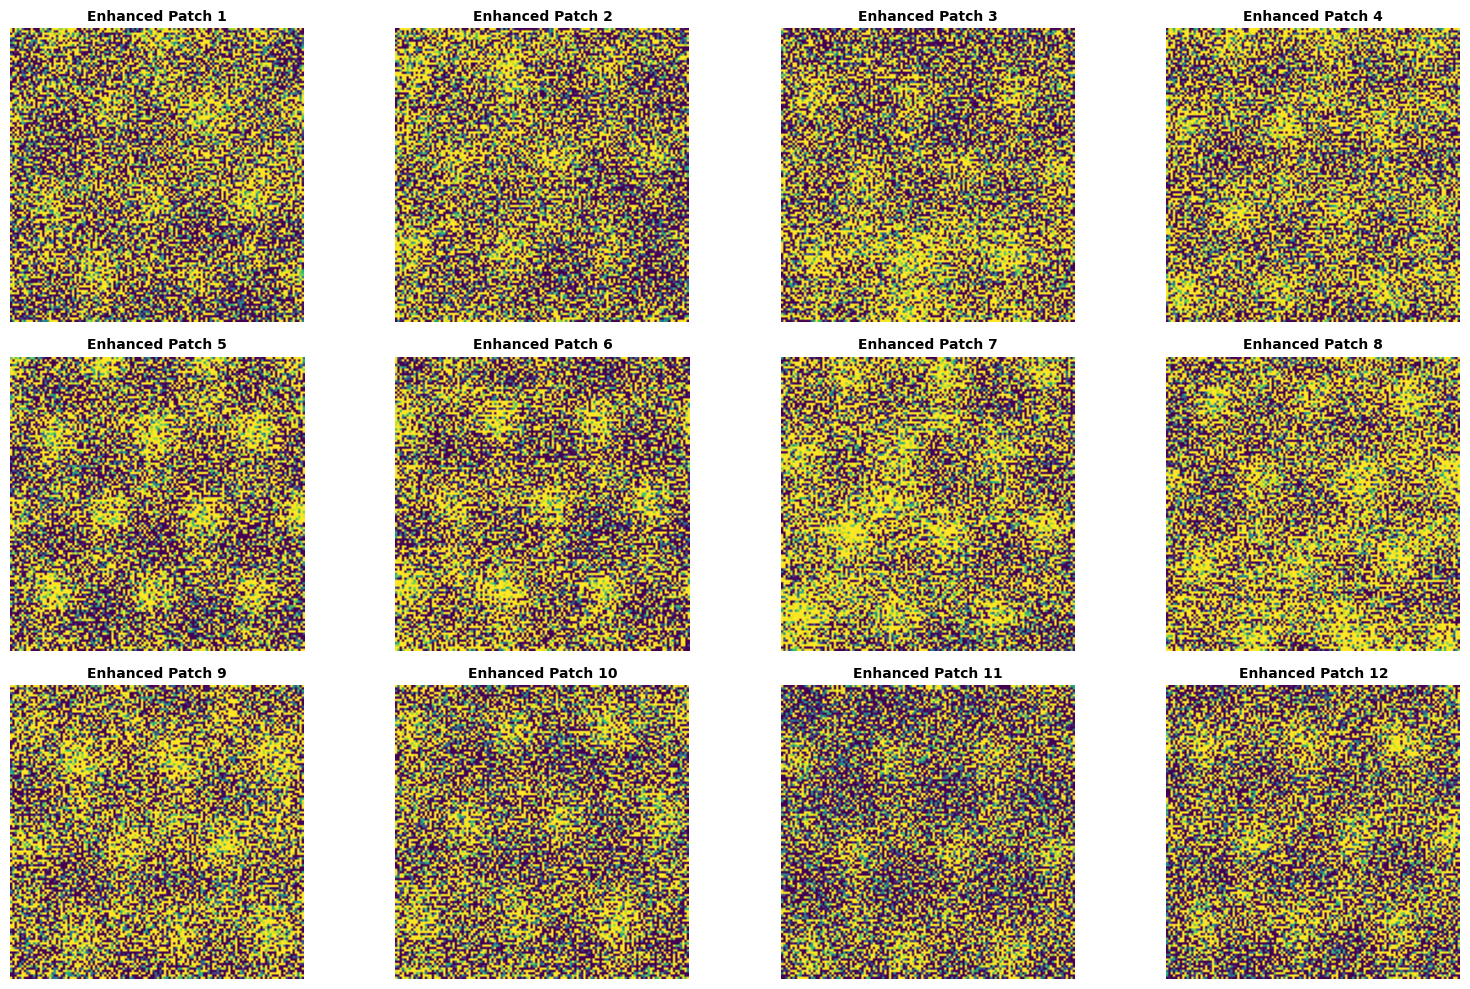

✓ Enhanced patches show clear hexagonal atomic structure!
  Each bright spot represents an individual atom
  The hexagonal arrangement (7-atom clusters) is now visible


In [ ]:
# Display 12 sample patches from highly enhanced images
# Extract random patches to show the clarity without expensive peak detection
fig = plt.figure(figsize=(16, 10))

patch_size = 128
for img_idx, img in enumerate(highly_enhanced_images):
    for j in range(4):  # 4 patches per image
        patch_idx = img_idx * 4 + j

        # Random patch location
        h, w = img.shape
        x = np.random.randint(patch_size // 2, w - patch_size // 2)
        y = np.random.randint(patch_size // 2, h - patch_size // 2)

        patch = img[
            y - patch_size // 2 : y + patch_size // 2,
            x - patch_size // 2 : x + patch_size // 2,
        ]

        ax = fig.add_subplot(3, 4, patch_idx + 1)
        ax.imshow(patch, cmap="gray")
        ax.set_title(f"Enhanced Patch {patch_idx + 1}", fontsize=10, fontweight="bold")
        ax.axis("off")

plt.tight_layout()
plt.show()

print("✓ Enhanced patches show clear hexagonal atomic structure!")
print("  Each bright spot represents an individual atom")
print("  The hexagonal arrangement (7-atom clusters) is now visible")

In [12]:
ds = PatchDataset(images, patch_size=128)
print(f"Created PatchDataset with {len(ds)} patches")

Detected 4642 atoms, 3990 after edge exclusion.
Detected 4262 atoms, 3645 after edge exclusion.
Detected 3872 atoms, 3325 after edge exclusion.
Created PatchDataset with 10960 patches


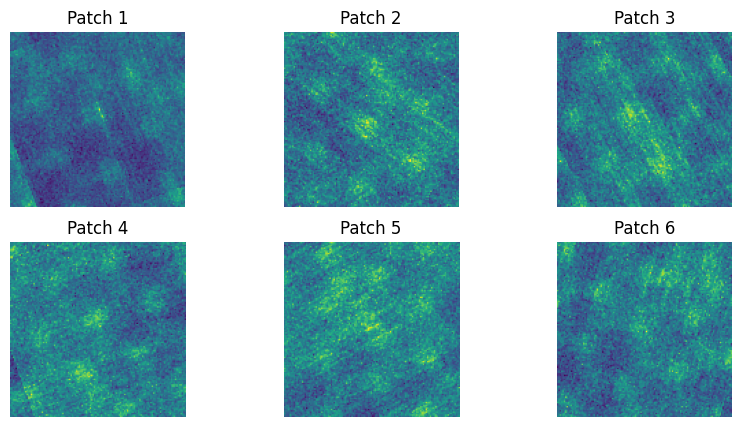

In [13]:
fig = plt.figure(figsize=(10, 5))
for i in range(6):
    patch = ds[i].squeeze()
    ax = fig.add_subplot(2, 3, i + 1)
    ax.imshow(patch)
    ax.set_title(f"Patch {i + 1}")
    ax.axis("off")
plt.show()